## A/B Simulation

**The Task:**  
* Investigate how the difference of a sample average value influence A/B test results;
* Find out what impact does a sample size have on A/B test results;
* What happens with p-value when we have two similar samples (same average and variance).

In [3]:
# importing libraries
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# number of days simulated per one iteration
days = 10

### Investigate how the difference of a sample average value influence A/B test results

**A small difference of a sample average value**

In [20]:
# samples parameters
mu_control, sigma_control, n_control = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 100.5, 20, 100

In [21]:
# boilerplates for our data
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

In [73]:
# simulating data
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'
    
    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'
    
    user_data = user_data.append(day_data_experiment).append(day_data_control)
    fit = stats.ttest_ind(user_data[user_data.group == 'experiment'].value,
                          user_data[user_data.group == 'control'].value)
    
    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
    
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = daily_data.append(current_data_stat)
    
    current_date += 1

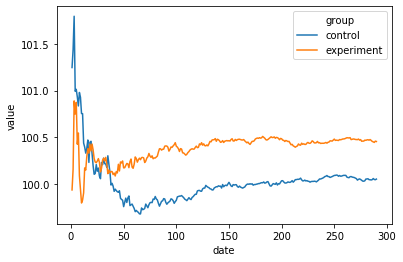

In [74]:
# plotting results of simulation (sample average value)
ax = sns.lineplot(data=daily_data, x='date', y='value', hue='group')

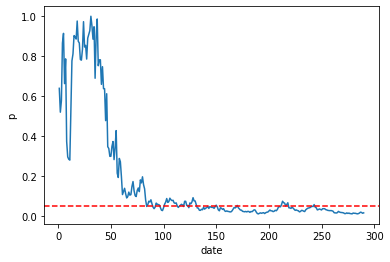

In [75]:
# plotting results of simulation (t-test p-value)
ax = sns.lineplot(data=stat_result, x='date', y='p')
ax.axhline(0.05, ls='--', color='red')  # plotting baseline (alpha = 0.05)

When we have a slight difference in samples average values we need pretty significant amount of time performing A/B test to be sure that we have statistically significant result.

**Considerably bigger difference of a sample average value**

In [76]:
# samples parameters
mu_control, sigma_control, n_control = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 102, 20, 100

In [77]:
# boilerplates for our data
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

In [84]:
# simulating data
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'
    
    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'
    
    user_data = user_data.append(day_data_experiment).append(day_data_control)
    fit = stats.ttest_ind(user_data[user_data.group == 'experiment'].value,
                          user_data[user_data.group == 'control'].value)
    
    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
    
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = daily_data.append(current_data_stat)
    
    current_date += 1

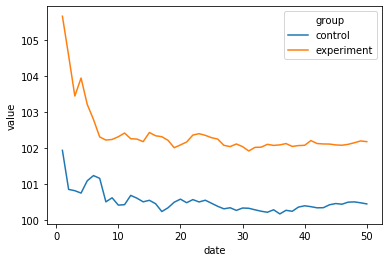

In [85]:
# plotting results of simulation (sample average value)
ax = sns.lineplot(data=daily_data, x='date', y='value', hue='group')

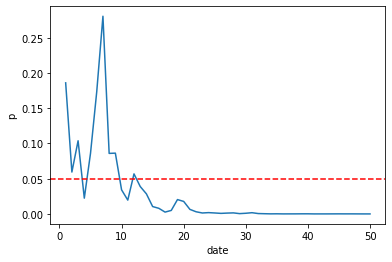

In [86]:
# plotting results of simulation (t-test p-value)
ax = sns.lineplot(data=stat_result, x='date', y='p')
ax.axhline(0.05, ls='--', color='red')  # plotting baseline (alpha = 0.05)

When we have a bigger difference in samples average values we need much less amount of time performing A/B test to be sure that we have statistically significant result.

### Find out what impact does a sample size have on A/B test results;

**A small difference of a sample average value, but significantly bigger sample size**

In [5]:
# samples parameters
mu_control, sigma_control, n_control = 100, 20, 1000
mu_experiment, sigma_experiment, n_experiment = 100.5, 20, 1000

In [6]:
# boilerplates for our data
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

In [14]:
# simulating data
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'
    
    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'
    
    user_data = user_data.append(day_data_experiment).append(day_data_control)
    fit = stats.ttest_ind(user_data[user_data.group == 'experiment'].value,
                          user_data[user_data.group == 'control'].value)
    
    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
    
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = daily_data.append(current_data_stat)
    
    current_date += 1

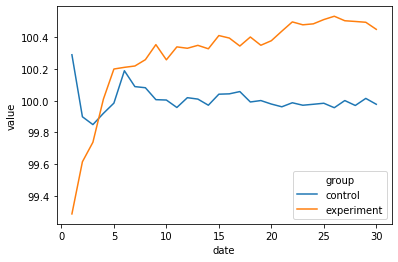

In [15]:
# plotting results of simulation (sample average value)
ax = sns.lineplot(data=daily_data, x='date', y='value', hue='group')

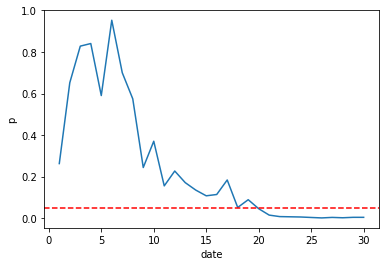

In [16]:
# plotting results of simulation (t-test p-value)
ax = sns.lineplot(data=stat_result, x='date', y='p')
ax.axhline(0.05, ls='--', color='red')  # plotting baseline (alpha = 0.05)

When we have a slight difference in samples average values but a bigger sample size, we need less amount of time performing A/B test to be sure that we have statistically significant result in comparison with a smaller sample size, but still more time if we'd have a bigger difference in samples average values.

### What happens with p-value when we have two similar samples (same average and variance)

In [125]:
# samples parameters
mu_control, sigma_control, n_control = 100, 20, 100
mu_experiment, sigma_experiment, n_experiment = 100, 20, 100

In [126]:
# boilerplates for our data
current_date = 1
user_data = pd.DataFrame()
stat_result = pd.DataFrame()
daily_data = pd.DataFrame()

In [138]:
# simulating data
for day in range(days):
    daily_data_control = np.random.normal(mu_control, sigma_control, n_control)
    daily_data_experiment = np.random.normal(mu_experiment, sigma_experiment, n_experiment)
    
    day_data_control = pd.DataFrame({'value': daily_data_control})
    day_data_control['date'] = current_date
    day_data_control['group'] = 'control'
    
    day_data_experiment = pd.DataFrame({'value': daily_data_experiment})
    day_data_experiment['date'] = current_date
    day_data_experiment['group'] = 'experiment'
    
    user_data = user_data.append(day_data_experiment).append(day_data_control)
    fit = stats.ttest_ind(user_data[user_data.group == 'experiment'].value,
                          user_data[user_data.group == 'control'].value)
    
    stat_result = stat_result.append(pd.DataFrame({'t': [fit[0]], 'p': [fit[1]], 'date': current_date}))
    
    current_data_stat = user_data.groupby(['group'], as_index=False).agg({'value': 'mean'})
    current_data_stat['date'] = current_date
    
    daily_data = daily_data.append(current_data_stat)
    
    current_date += 1

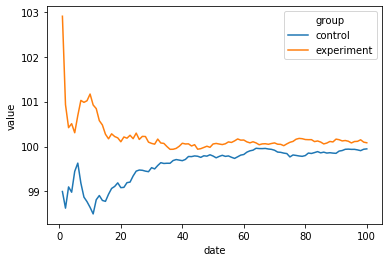

In [139]:
# plotting results of simulation (sample average value)
ax = sns.lineplot(data=daily_data, x='date', y='value', hue='group')

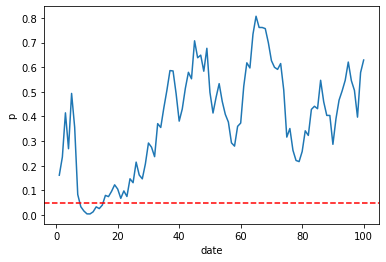

In [141]:
# plotting results of simulation (t-test p-value)
ax = sns.lineplot(data=stat_result, x='date', y='p')
ax.axhline(0.05, ls='--', color='red');  # plotting baseline (alpha = 0.05)

Samples are similar but we've had a 'false alarm' (False Positive I Type Error) in the very beginning of the test!  
We should be careful and never stop A/B test after we have seen the very first chance to reject the null hypothesis.

### Conclusion

* The bigger the difference between samples the less time we need to spend to obtain A/B test robust results;
* The bigger sample size the less time we need to spend to obtain A/B test robust results;
* There can be 'false alarms' (False Positive I Type Error) when we have similar samples but spent not enough time performing A/B test;
* Never stop A/B test after you have just seen the very first opportunity to reject the null hypothesis. Wait a bit to be sure it wasn't a 'false alarm'.